(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
Epoch 1/10
25/25 [========================================]  loss: 0.09076036021920535 valid accuracy:0.325

Epoch 2/10
25/25 [========================================]  loss: 0.07487570182707193 valid accuracy:0.445

Epoch 3/10
25/25 [========================================]  loss: 0.06267078107346682 valid accuracy:0.54

Epoch 4/10
25/25 [========================================]  loss: 0.05015623297852666 valid accuracy:0.63

Epoch 5/10
25/25 [========================================]  loss: 0.03914365739603901 valid accuracy:0.69

Epoch 6/10
25/25 [========================================]  loss: 0.032339811117477475 valid accuracy:0.705

Epoch 7/10
25/25 [========================================]  loss: 0.02756678332925555 valid accuracy:0.74

Epoch 8/10
25/25 [========================================]  loss: 0.02392891805905831 valid accuracy:0.755

Epoch 9/10
25/25 [========================================]  loss: 0.021122861838

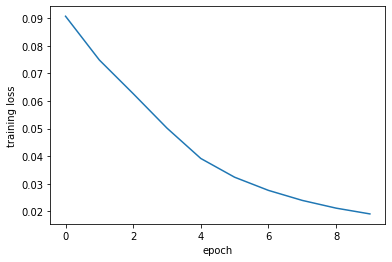

test accuracy:0.8007


In [4]:
from my_sequential import MyDenseLayer, MySequential
import tensorflow as tf
import numpy as np
from help_func import one_hot

# 加载训练集
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
np.random.seed(233)
np.random.shuffle(X_train)
np.random.seed(233)
np.random.shuffle(y_train)

X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape(
    len(X_train), -1), X_test.reshape(len(X_test), -1)
# 转换成独热码
y_train = one_hot(y_train, num_classes=10)
y_test = one_hot(y_test, num_classes=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 创建单隐藏层神经网络
model = MySequential(
    [MyDenseLayer(in_features=784, out_features=100, activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=100,
                  activation='relu', bias=True),
     MyDenseLayer(in_features=100, out_features=10, activation='softmax', bias=True)])

X_train, y_train = X_train[1000:2000, :], y_train[1000:2000]
# learning rate 学习率有甜点，这个数据集这个方法大概在0.1-0.3之间效果好
model.fit(X_train, y_train, epoch=10, batch_size=32,
          learning_rate=0.1, loss='mse', valid_spilt=0.2)
print('test', end=" ")
model.evaluate(X_test, y_test)


In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape(
    len(X_train), -1), X_test.reshape(len(X_test), -1)
# y_train = one_hot(y_train, num_classes=10)
# y_test = one_hot(y_test, num_classes=10)
print(X_train.shape, y_train.shape)

X_train, y_train = X_train[1000:2000, :], y_train[1000:2000]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=False))
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(X_test, y_test)


(60000, 784) (60000, 10)
Epoch 1/10
25/25 [==============================] - 0s 7ms/step - loss: 5.9362 - val_loss: 4.5108
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: nan


nan

In [12]:
import sys
import time

print('asdas')
for i in range(11):
    # 方式1
    sys.stdout.write('\r' + str(i))
    sys.stdout.flush()
    # # 方式2
    # print('\r' + str(i), end='', flush=True)

    time.sleep(0.3)
print('asdsa')


asdas
10asdsa
